In [39]:
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import fbprophet
import datetime

In [40]:
dow = pd.read_csv("DOWJONESIA.csv")

dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-12,19926.21094,19929.28906,19770.47070,19891.00000,19891.00000,306290000
1,2017-01-13,19912.53906,19952.02930,19849.38086,19885.73047,19885.73047,263780000
2,2017-01-17,19848.82031,19882.99023,19775.34961,19826.76953,19826.76953,341900000
3,2017-01-18,19822.73047,19828.19922,19739.00000,19804.72070,19804.72070,279760000
4,2017-01-19,19813.55078,19824.14063,19677.93945,19732.40039,19732.40039,301750000


In [41]:
gold = pd.read_csv("GOLD.csv")
gold.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-12,1192.699951,1204.300049,1192.300049,1198.900024,1198.900024,20.0
1,2017-01-13,1195.699951,1196.000000,1187.699951,1195.300049,1195.300049,110.0
2,2017-01-15,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-17,1205.500000,1214.599976,1200.800049,1212.000000,1212.000000,65.0
4,2017-01-18,1213.599976,1214.699951,1203.099976,1211.300049,1211.300049,79.0


In [42]:
nasdaq = pd.read_csv("NASDAQ.csv")
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-12,5542.560059,5550.669922,5496.819824,5547.490234,5547.490234,1801750000
1,2017-01-13,5557.569824,5584.259766,5557.200195,5574.120117,5574.120117,1605110000
2,2017-01-17,5555.160156,5557.049805,5527.220215,5538.729980,5538.729980,1757030000
3,2017-01-18,5546.939941,5555.979980,5534.770020,5555.649902,5555.649902,1683320000
4,2017-01-19,5560.609863,5571.529785,5528.370117,5540.080078,5540.080078,1805710000


In [43]:
sp = pd.read_csv("S&P500.csv")
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3462130000
1,2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3081270000
2,2017-01-17,2269.139893,2272.080078,2262.810059,2267.889893,2267.889893,3584990000
3,2017-01-18,2269.139893,2272.010010,2263.350098,2271.889893,2271.889893,3315250000
4,2017-01-19,2271.899902,2274.330078,2258.409912,2263.689941,2263.689941,3165970000


In [44]:
ue = pd.read_csv("UNEMPLOYMENT.csv")
ue.head()

,TIME,AUS,CAN,JPN,KOR,USA,COL
0,2016-12,72.33047,72.9,74.86798,66.37878,69.55674,66.97453
1,2017-01,72.45253,73.3,74.90620,66.22135,69.62999,66.89488
2,2017-02,72.27098,73.2,74.89613,66.54292,69.71534,67.31184
3,2017-03,72.53445,73.3,74.95401,66.64056,70.08239,66.95603
4,2017-04,72.71819,73.2,75.08261,66.64005,70.13604,67.38593


In [45]:
ue.dtypes

TIME     object
AUS     float64
CAN     float64
JPN     float64
KOR     float64
USA     float64
COL     float64
dtype: object

In [46]:
ue['TIME'] = pd.to_datetime(ue['TIME'])


In [47]:
ue.head()

,TIME,AUS,CAN,JPN,KOR,USA,COL
0,2016-12-01,72.33047,72.9,74.86798,66.37878,69.55674,66.97453
1,2017-01-01,72.45253,73.3,74.90620,66.22135,69.62999,66.89488
2,2017-02-01,72.27098,73.2,74.89613,66.54292,69.71534,67.31184
3,2017-03-01,72.53445,73.3,74.95401,66.64056,70.08239,66.95603
4,2017-04-01,72.71819,73.2,75.08261,66.64005,70.13604,67.38593


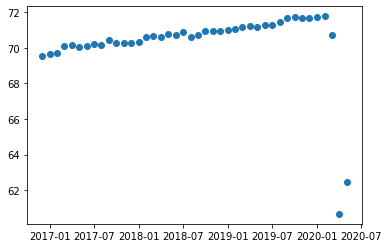

In [48]:
pyplot.plot_date(ue['TIME'], ue['USA'])

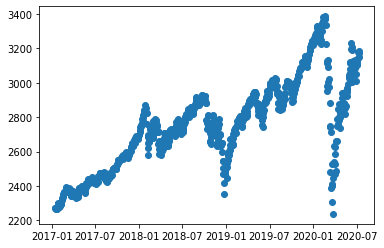

In [49]:
sp['Date'] = pd.to_datetime(sp['Date'])
pyplot.plot_date(sp['Date'], sp['Close'])

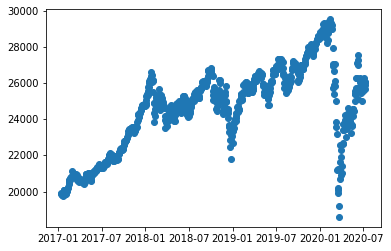

In [50]:
dow['Date'] = pd.to_datetime(dow['Date'])
pyplot.plot_date(dow['Date'], dow['Close'])

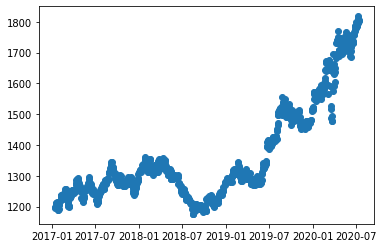

In [51]:
gold['Date'] = pd.to_datetime(gold['Date'])
pyplot.plot_date(gold['Date'], gold['Close'])

In [52]:
!which python; python -V;

GNU which v2.21, Copyright (C) 1999 - 2015 Carlo Wood.
GNU which comes with ABSOLUTELY NO WARRANTY;
This program is free software; your freedom to use, change
and distribute this program is protected by the GPL.


In [53]:
sp = sp.rename(columns={'Date': 'ds', 'Close': 'yhat'})
sp['y'] = sp['y']
# Make the prophet model and fit on the data
sp_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
sp_prophet.fit(sp)
plot = sp_prophet.plot(sp)
pyplot.plot_date(sp['ds'], sp['yhat'])

KeyError: 'y'